## Final Project Submission

Please fill out:
* Student name: Ochieng Calvince Mbara
* Student pace: self paced / part time / full time: Full time
* Scheduled project review date/time: 30/09/2022
* Instructor name: William Okomba
* Blog post URL:


# Business Understanding

# Business overview

A Real Estate Agency is project management body tasked with giving advices to homeowners on when they can buy or sell homes. They also cite the relevancy to why it should be so.

# Objectives

We are therefore intrested in knowing how house renovation would help homeowners to be able to predict the current and future prices of their houses so that they be aware of what best time they can buy or sell the houses.

In addition, we want to be able to offer a constructive advice to the stakeholders about the current and future prices of the houses by building or creating a model that will predict the price of these houses.This models will help in coming up with a plan on when it is appropriate to buy or sell.

We also want to come up with an analysis so that we know how factors like location, bathrooms and the condition of the houses can be of what influence to the estimated value of the houses and by what amount. This will assist in knowing where to put more strenght so as to achieve the rationale of this project.

# Importing dependencies

In [1]:
# importing neccessary libraries
#For numerical oerations
import numpy as np
# For loading data ,data analysis and data cleaning
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings ('ignore')

# Data Loading

The dataset is from kc_house_data.csv

In [2]:
houses_df = pd.read_csv("data/kc_house_data.csv")

# Data Understanding

1. having a look at the dataframe overview
2. checking for the shape of the dataframe
3. checking the columns of the dataframe
4. checking if the rows are duplicated in the dataframe
5. checking for null values in the dataframe

In [3]:
#dataset overview
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
houses_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
# shape of the dataframe
houses_df.shape

(21597, 21)

In [6]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#checking  the columns in the dataset
houses_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#descriptive statistics of the dataset
houses_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#checking for unique values in each column
houses_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [10]:
#checking for null values in the dataset
houses_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Observations

1. The dataset is in form of a csv file
2. The dataframe has a total of 21597 rows and 21 columns
3. The dataframe has 6 object, 6 float, 9 int64
4. yr_renovated, waterfront,and view has null values

# Data Preparation

# a) Univariate Analysis

# Data cleaning

* drop rows with null values
* checking for duplicates and missing values
* checking for outliers

In [11]:
houses_df.dropna(inplace = True)

In [12]:
houses_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
missing_data_check = houses_df.isnull().sum().sort_values(ascending = False)
missing_data_check

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

# Observation

"waterfront", "view", "yr_renovated" contains null values

In [14]:
#checking for duplicates
row,col = houses_df.shape
houses_df.drop_duplicates(inplace = True)

if houses_df.shape==(row,col):
    print('The dataset doesnt\'t have any duplicates')
else:
    print('The dataset have duplicates')

The dataset doesnt't have any duplicates


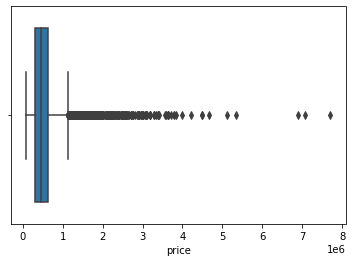

In [15]:
#box plot showing outliers on the price column
sns.boxplot(x=houses_df['price']);

In [16]:
#checking for outliers
def outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
# Checking the number of outliers in the 'price' column
print("Count of outliers:",outlier(houses_df.price).count())

Count of outliers: 831


# Observation

The dataset has no duplicates

# Bivariate

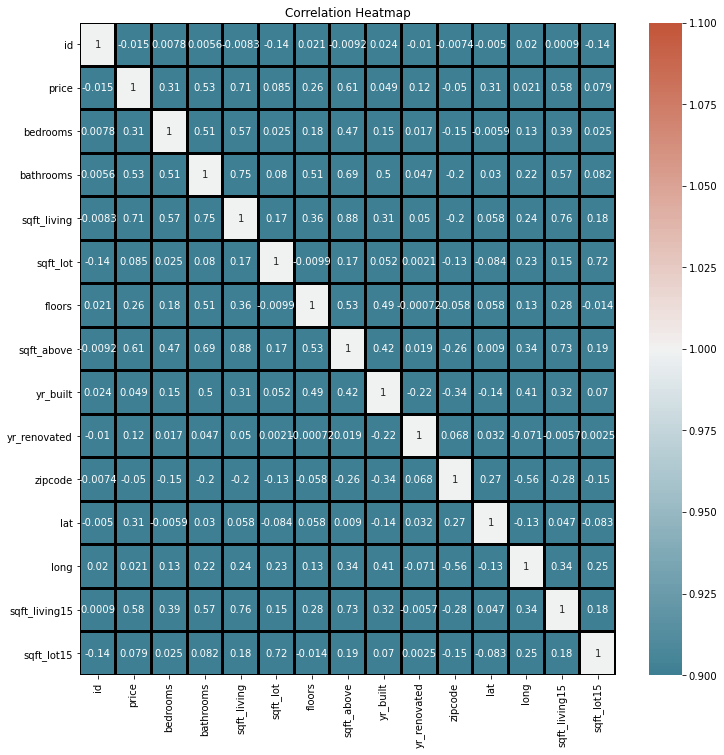

In [17]:
#A heatmap showing correlation between different column pairs
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(houses_df.corr(),vmin=1,vmax=1,annot=True,cmap=cmap,linewidths=2,linecolor='black')
heatmap.set_title('Correlation Heatmap');tt

# Exploring 'price' column

1. Explore the price column using heatmap
2. Compute the correlation coefficient for price column with other columns

In [18]:
#descriptive statistics summary of the dataset
summary_statistics = houses_df.price.describe()
print("count:",summary_statistics[1])
print("Mean of the price:",summary_statistics[1])
print("Standard deviation of mean:",summary_statistics[2])
print("Minimum value for price:",summary_statistics[3])
print("Lower quantile for price:",summary_statistics[4])
print("median for price:",summary_statistics[5])
print("Upper quantile for the price:",summary_statistics[6])
print("Maximum value for the price:",summary_statistics[7])

count: 541317.1757391194
Mean of the price: 541317.1757391194
Standard deviation of mean: 372225.83872707107
Minimum value for price: 82000.0
Lower quantile for price: 321000.0
median for price: 450000.0
Upper quantile for the price: 644875.0
Maximum value for the price: 7700000.0


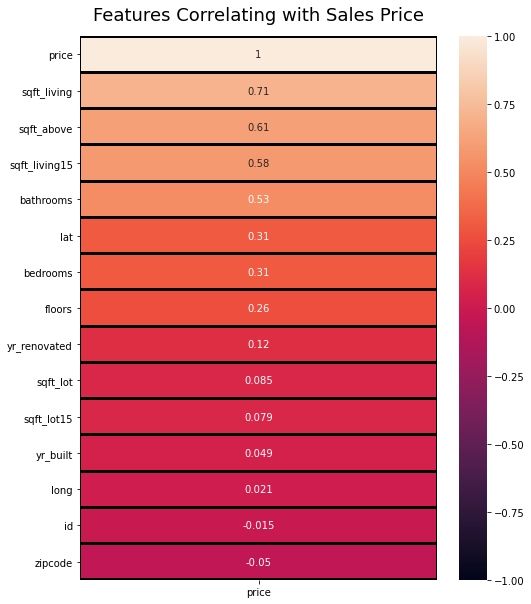

In [19]:
#heatmap showing the correaltion of price column with the independent variables
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(
    houses_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

# Linear Regression Assumptions

# Linearity

In [20]:
# to show the most correlated columns with price columns
PriceCorr = houses_df.corr()['price']
filteredcorr = PriceCorr[((PriceCorr >= .5) | (PriceCorr <= -.5)) & (PriceCorr !=1.000)].sort_values(ascending = False)
filteredcorr

sqft_living      0.706189
sqft_above       0.612014
sqft_living15    0.581572
bathrooms        0.526155
Name: price, dtype: float64

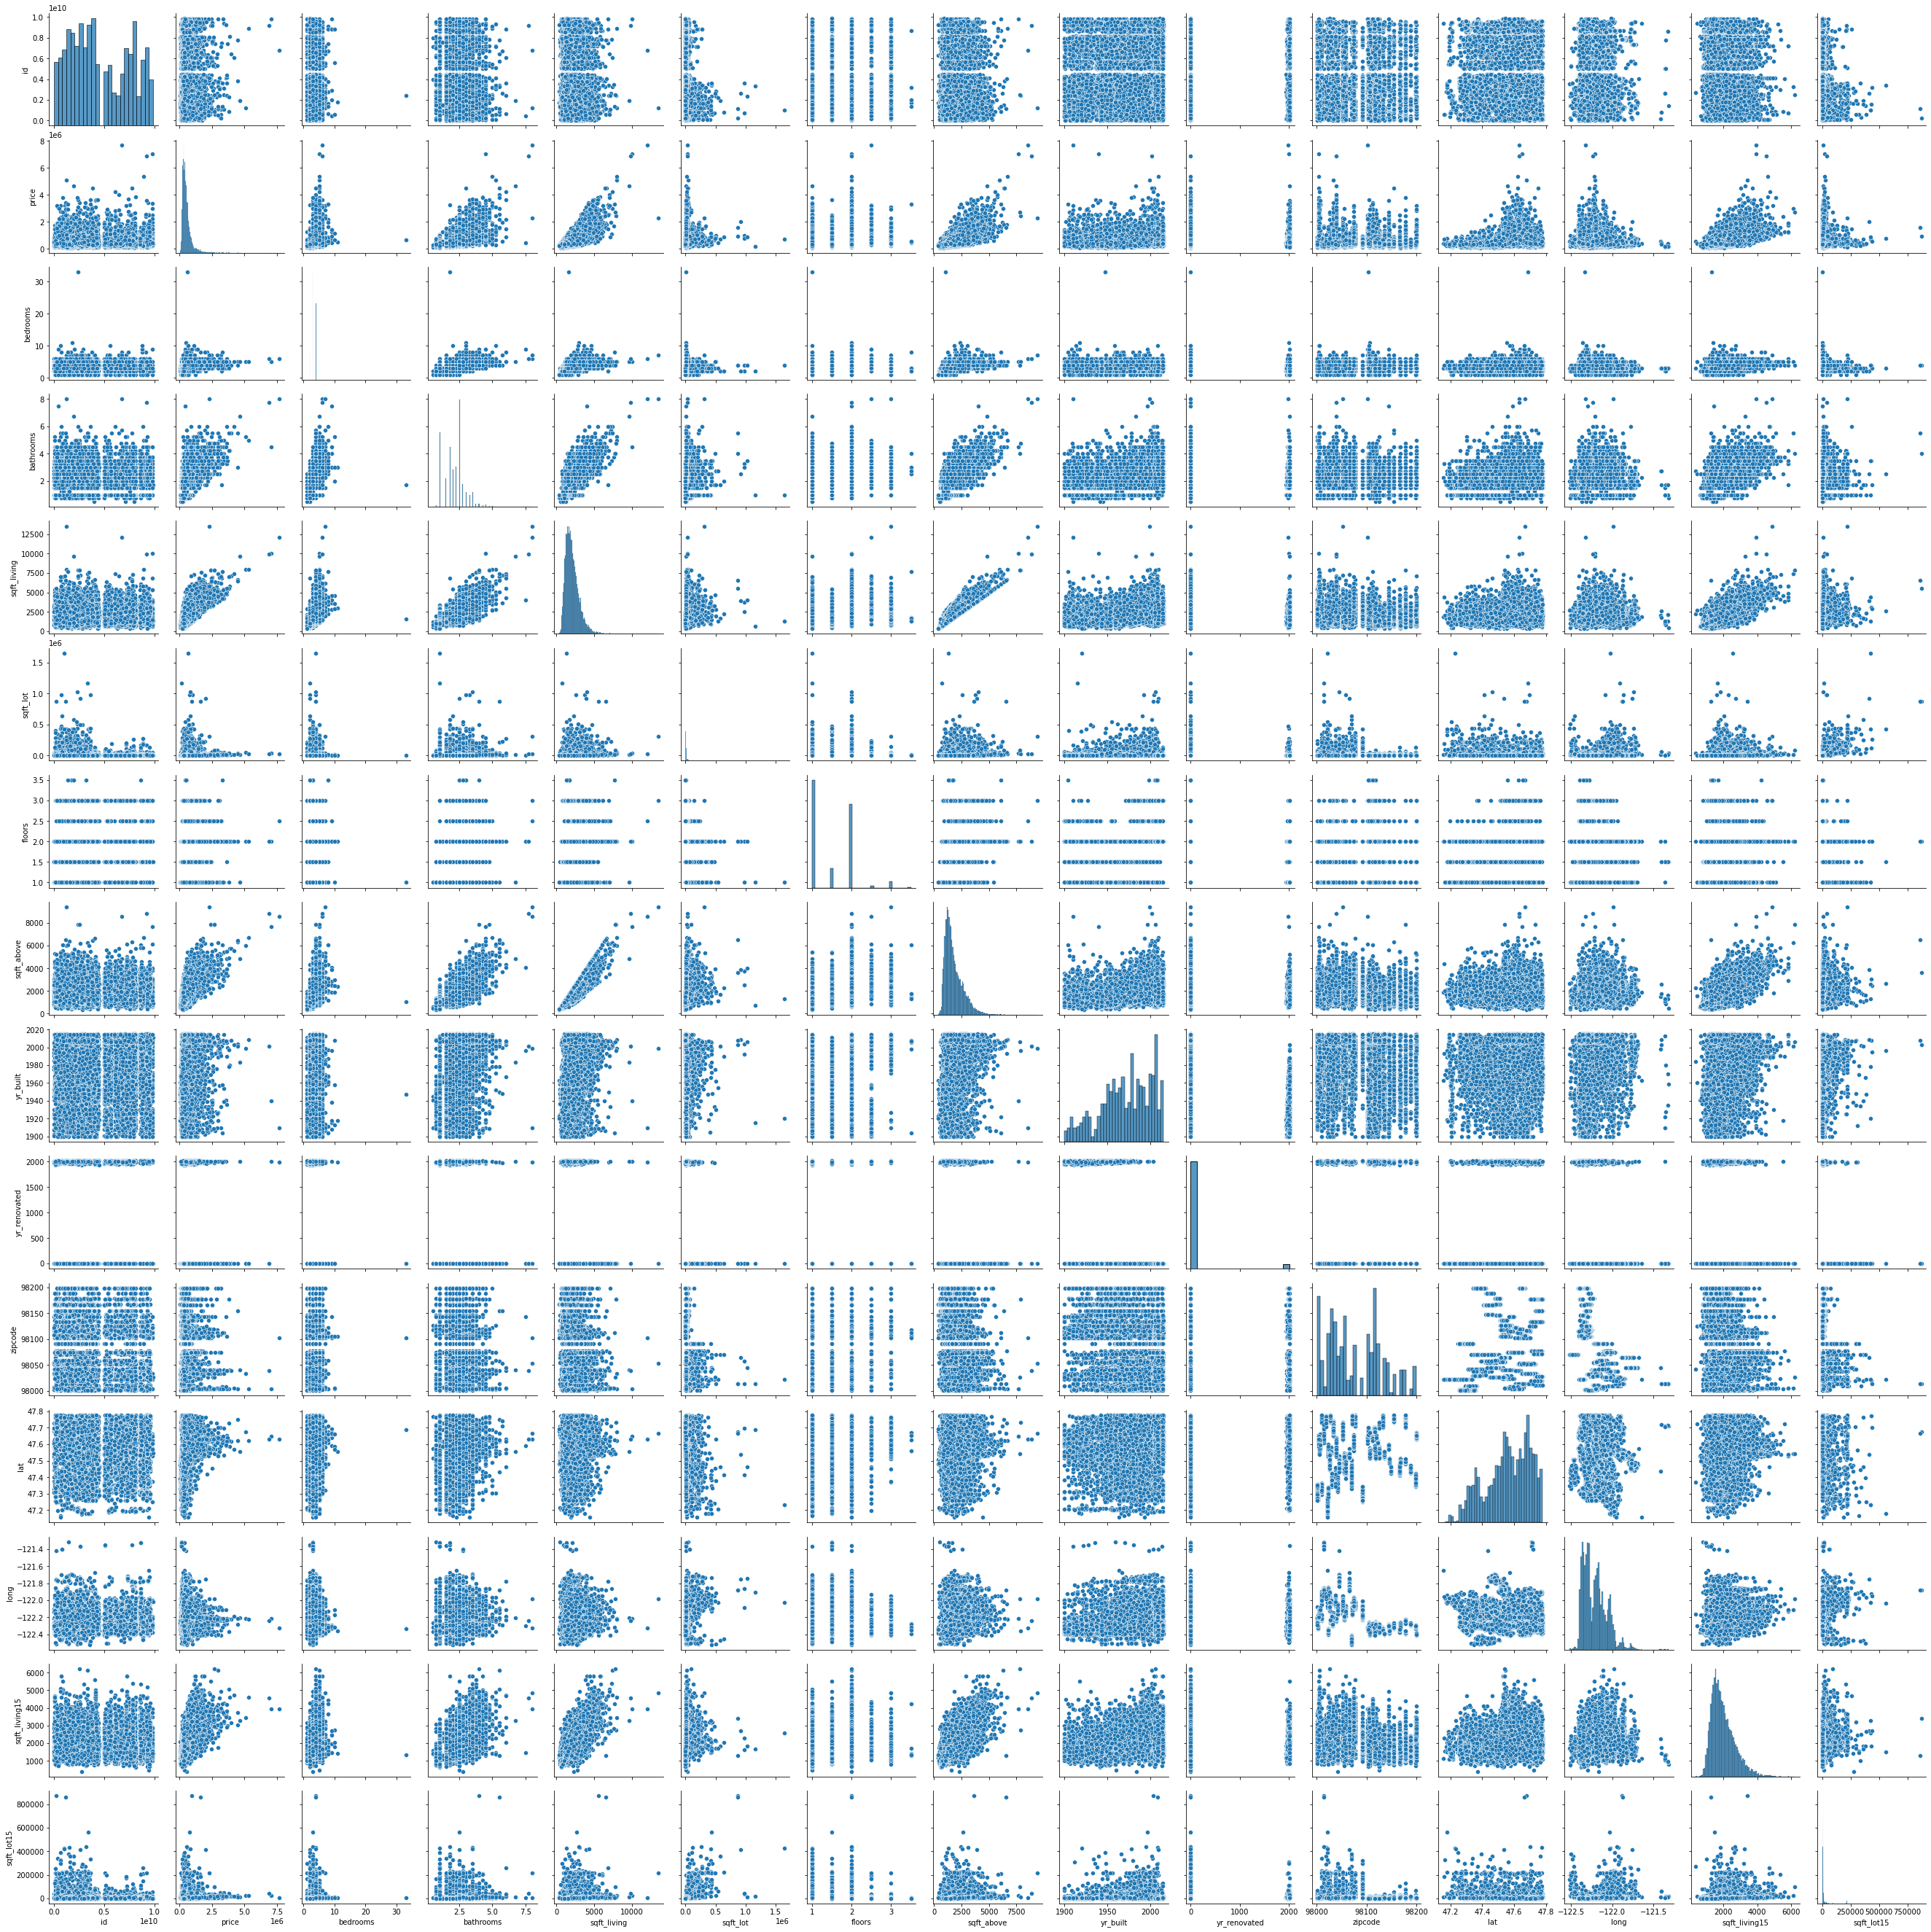

In [21]:
# Pairplot to show linearity between the variables
sns.pairplot(houses_df);

# Relationship with categorical

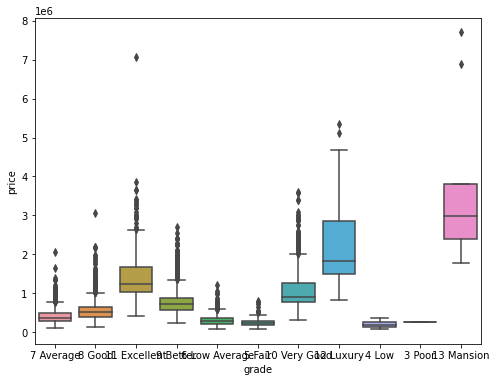

In [22]:
var = 'grade'
data = pd.concat([houses_df['price'], houses_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data);

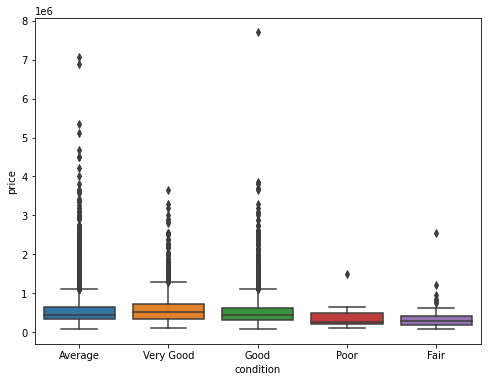

In [23]:
var = 'condition'
data = pd.concat([houses_df['price'], houses_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data);

# Observation

1. Grade and price are not related.
2. There is a stronger relationship between 'price' and 'condition' where prices decrease with the condition of the house

# Relationship with  Numerical data

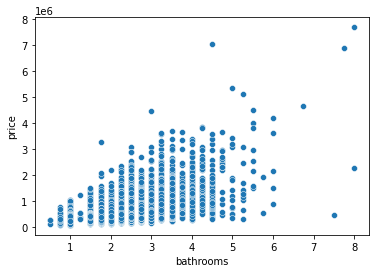

In [24]:
#scatter plot between price and bathroom
bathrooms = houses_df["bathrooms"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = bathrooms,y = price);

In [25]:
count = 0
bath_outliers = []
mean = np.mean(houses_df['bathrooms'])
max_distance = np.std(houses_df['bathrooms']) * 3
for idx, row in houses_df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        houses_df.drop(idx, inplace=True)
count

137

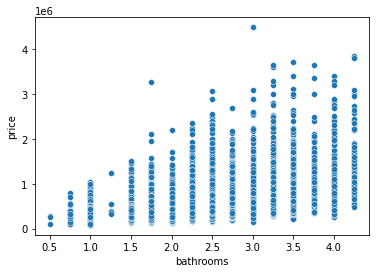

In [26]:
#scatter plot between price and bathroom
bathrooms = houses_df["bathrooms"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = bathrooms,y = price);

# Observation

bathrooms' seem to be linearly related with 'price' column. This relationship is positive which means that an increase in the numbers of bathrooms leads to an increase in price

# b) Normality

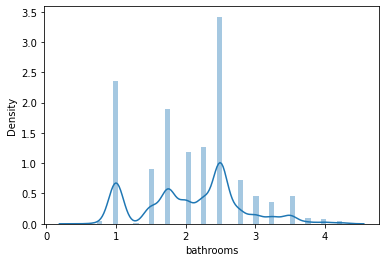

<Figure size 432x288 with 0 Axes>

In [27]:
#distribution for bathrooms
sns.distplot(houses_df['bathrooms'])
fig = plt.figure();

In [28]:
#skewness and kurtosis
print("Skewness: %f" % houses_df['bathrooms'].skew())
print("Kurtosis: %f" % houses_df['bathrooms'].kurt())

Skewness: 0.126874
Kurtosis: -0.349934


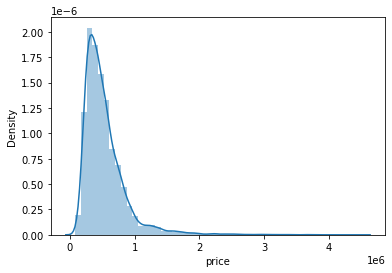

In [29]:
# checking the distribution of price column
sns.distplot(houses_df['price']);

In [30]:
#skewness and kurtosis
print("Skewness: %f" % houses_df['price'].skew())
print("Kurtosis: %f" % houses_df['price'].kurt())

Skewness: 2.956329
Kurtosis: 15.296305


# Observation from the distribution for price column

1. The plot shows the price column is positively skewed
2. from our plotting is is evident that our data is not normally distributed
3. It also displays a leptokurtic kurtosis

# Simple linear regression

for this model we going to use bathrooms as our independent variable and price as the dependent variable

Determining x and y variables

In [31]:
# independent variable

X_baseline = houses_df['bathrooms']

# dependent variable

y = houses_df['price']

# Creating the Model

In [32]:
# Creating a simple linear regression model

model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))  # Ordinary Least Squares 

results = model.fit()  

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4939.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:47:58   Log-Likelihood:            -2.1870e+05
No. Observations:               15625   AIC:                         4.374e+05
Df Residuals:                   15623   BIC:                         4.374e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.708e+04   7124.887      8.011      0.000    4.31e+04     7.1e+04
bathrooms   2.258e+05   3213.150     70.280      0.000     2.2e+05    2.32e+05
==============================================================================
Omnibus:                     9840.169   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179868.575
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      18.702   Cond. No.                         8.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
results.params

const         57078.647105
bathrooms    225818.624235
dtype: float64

In [35]:
print(results.conf_int())

                       0              1
const       43113.043329   71044.250881
bathrooms  219520.477249  232116.771220


# Model summary

1. The model is statistically significant having F-statistic p-value below the alpha,given that the alpha is 0.05.
2. The model explains about 24% of the variance in price.
3. The model coefficients (const and bathrooms) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.
5. Looking at the summary above, we can see that the regression line we found was

                   price^= 57078.647105 + 225818.624235bathrooms
6. For every increase in bathroom there is an increase in price by about USSD 225818.624235

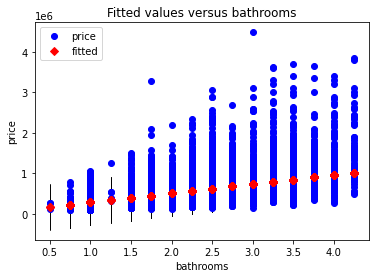

In [36]:
# Visualizing our plot fit model
sm.graphics.plot_fit(results, "bathrooms")
plt.show()

In [37]:
results.resid

1        -27170.551633
3       -130534.519808
4          1284.104426
6       -307670.551633
8        -53397.271339
             ...      
21591   -146625.207691
21592   -261625.207691
21593   -221625.207691
21594    175658.384719
21596     98557.384719
Length: 15625, dtype: float64

In [38]:
#apply log transformation
houses_df['lg_price'] = np.log(houses_df['price'])

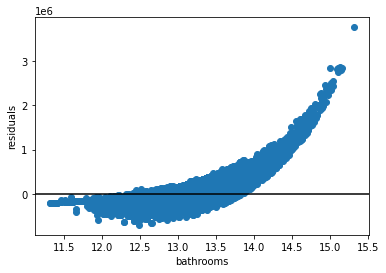

In [39]:
#visualizing the distribution for residuals
fig, ax = plt.subplots()
ax.scatter(np.log(houses_df['price']), results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("bathrooms")
ax.set_ylabel("residuals");

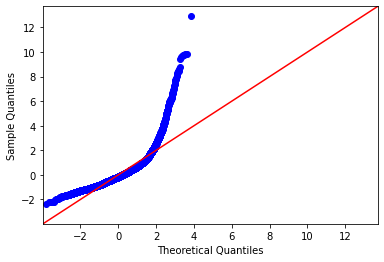

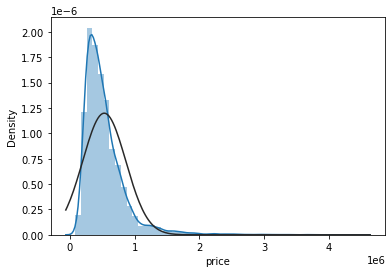

In [40]:
from scipy.stats import norm
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit = True)
plt.show()
sns.distplot(houses_df.price, fit=norm);

In [42]:
#apply log transformation
houses_df.log_price = np.log(houses_df.price)

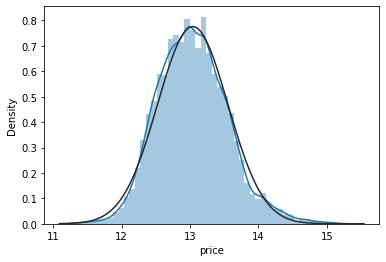

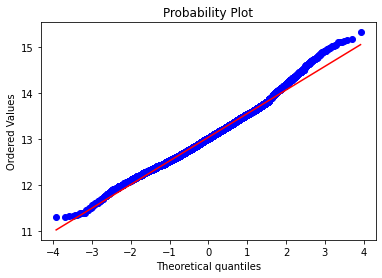

In [43]:
#transformed histogram and normal probability plot
sns.distplot(houses_df.log_price, fit=norm);
fig = plt.figure()
r = stats.probplot(houses_df.log_price, plot=plt)

# Adding another independent variable

# Multiple Linear Regression

In [44]:
# Adding another independent variable
x_second = houses_df[['bedrooms', "bathrooms"]]
x_second

,bedrooms,bathrooms
1,3,2.25
3,4,3.00
4,3,2.00
6,3,2.25
8,3,1.00
...,...,...
21591,3,2.50
21592,3,2.50
21593,4,2.50
21594,2,0.75


In [45]:
second_model = sm.OLS(endog = y, exog = sm.add_constant(x_second))
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     2517.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:53:08   Log-Likelihood:            -2.1866e+05
No. Observations:               15625   AIC:                         4.373e+05
Df Residuals:                   15622   BIC:                         4.374e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6404.5259   9265.601      0.691      0.4

# Model summary

1. The model is statistically significant having F-statistic p-value below the alpha,given that the alpha is 0.05.

2. The model explains about 24% of the variance in price.

3. The model coefficients (const, bathrooms, and bedrooms) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.
4. Looking at the summary above, we can see that the regression line we found was

            price^= 6404.5259  + 210371.603521bathrooms + 24693.743294bedrooms
5. The price of a house increses with an increase in number of bedrooms and bathrooms.for each bedroom there is an increase in price by 24693.743294dollars, and for an increase in bathroom there is an increase in price by 210371.603521 dollars

In [52]:
second_results.params

const          6404.525855
bedrooms      24693.743294
bathrooms    210371.603521
dtype: float64

In [54]:
second_results= second_results.resid.abs().sum()/len(y)
second_results

194610.9269568362

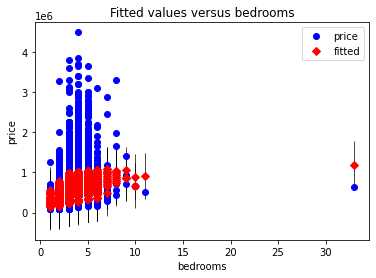

In [46]:
sm.graphics.plot_fit(second_results,"bedrooms")
plt.show();

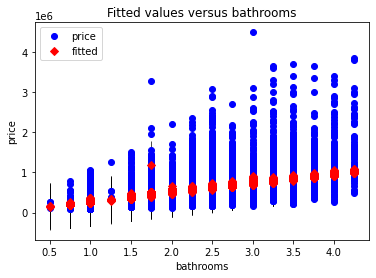

In [47]:
#plotting the fit results
sm.graphics.plot_fit(second_results,"bathrooms")
plt.show();

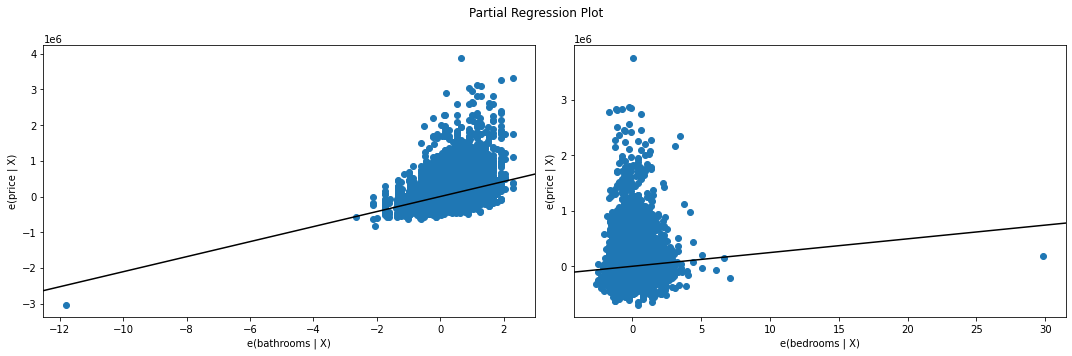

In [48]:
#partial regression plot
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["bathrooms", "bedrooms"], fig=fig)
plt.tight_layout()
plt.show()

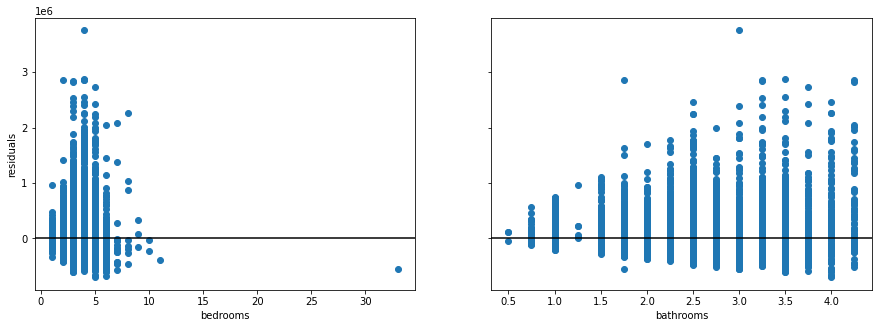

In [49]:
# visualizing the distribution for the residuals 
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

bedrooms_ax = axes[0]
bedrooms_ax.scatter(houses_df["bedrooms"], second_results.resid)
bedrooms_ax.axhline(y=0, color="black")
bedrooms_ax.set_xlabel("bedrooms")
bedrooms_ax.set_ylabel("residuals")

bathrooms_ax = axes[1]
bathrooms_ax.scatter(houses_df["bathrooms"], second_results.resid)
bathrooms_ax.axhline(y=0, color="black")
bathrooms_ax.set_xlabel("bathrooms");

# Adding Many Features

In [50]:
# creating the model
x_all = houses_df.drop('price', axis=1).select_dtypes('number')
x_all

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lg_price
1,6414100192,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
3,2487200875,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,13.142166
6,1321400060,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,12.458775
8,2414600126,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113,12.343658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3,2.50,1310,1294,2.0,1180,2008,0.0,98116,47.5773,-122.409,1330,1265,13.071070
21592,263000018,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,12.793859
21593,6600060120,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,12.899220
21594,1523300141,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,12.904459


In [51]:
third_model = sm.OLS(y, sm.add_constant(x_all))
third_results = third_model.fit()
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     6120.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:55:58   Log-Likelihood:            -2.0577e+05
No. Observations:               15625   AIC:                         4.116e+05
Df Residuals:                   15609   BIC:                         4.117e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.691e+05   2.13e+06      0.173

In [59]:
third_results.params

const            369136.681332
id                   -0.000002
bedrooms         -24187.837491
bathrooms        -12115.064514
sqft_living          50.218852
sqft_lot             -0.097485
floors           -18374.677767
sqft_above           23.584338
yr_built           -453.482336
yr_renovated          8.352577
zipcode            -117.134719
lat             -220312.565564
long            -127184.572208
sqft_living15        -2.647203
sqft_lot15           -0.194213
lg_price         573849.562170
dtype: float64

# Model summary

1. The model is statistically significant having F-statistic p-value below the alpha,given that the alpha is 0.05.

2. The model explains about 86% of the variance in price.

3. The model coefficients (const, bathrooms, and bedrooms) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.
4. Looking at the summary above, we can see that the regression line we found was

     price^= 369137  - 0.000002id - 24187.837491bedrooms -12115.064514 bathrooms +50.218852sqft_living -0.097485sqft_lot  -18374.677767floors + 23.584338sqft_above -453.48233yr_built +8.352577 yr_renovated -117.134719 zipcode -220312.565564lat -127184.572208long -2.647203sqft_living15  -0.194213sqft_lot15
5. Nearly all of the model coefficients have p-values less than 0.05 and are thus statistically significant. 



# Linear Regression Model Results

* The third model where all the predictor variables were were used explains about 85% of variance in price unlike the  previous models that explains about 24%, 24% of variance respectively.
* All the models are statistically significant having a p_value of less than 0.005
* The value of our r_squared constantly increase as we add more predictors.
* The last model would be an ideal in predicting the current and future prices of the house.
* bathrooms , bedrooms, and condition affect the prices of the houses in that an increase in the number of bedrooms , bathrooms, and good condition of the house would lead to an increase in price of that house.



# Limitataions

* The model perform poorly with the variables that are not linearl because linear regression assumes a linear relationship between the input and output variables

# Recommendation

* I would recommend that the Agency adopt the last model since it has  a higher r_squared value of 0.85 which translate to 85% accuracy of the model.
* Features such as condition , bedrooms, bathrooms, and sqft_living of the house should be put into consideration because they affect prices positively .
* By using this model the Agency is able to offer reasonable advices to the homeowners which will inturn help them in knowing how to maximize profits and minimize losses.
* I would also recommend the Agency that they advice the homeowners to improve features such as waterfront, view as they have a greater impact to the house prices as well
